In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm

(matrix([[0],
        [0]]), (2, 1))


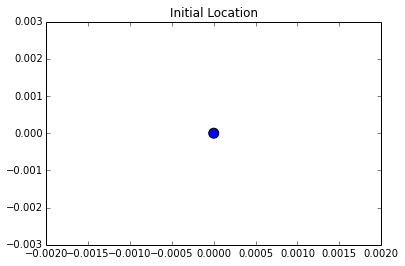

In [45]:
dx=0.0
dy=0.0
x = np.matrix([[dx, dy]]).T
print(x, x.shape)
n=x.size # States
plt.scatter(float(x[0]),float(x[1]), s=100)
plt.title('Initial Location')

In [21]:
P = np.eye(2)
print(P, P.shape)

(array([[ 1.,  0.],
       [ 0.,  1.]]), (2, 2))


In [22]:
dt = 0.5 # Time Step between Filter Steps

A = np.matrix([[1.0, 0.0],
              [0.0, 1.0]])
print(A, A.shape)

(matrix([[ 1.,  0.],
        [ 0.,  1.]]), (2, 2))


In [23]:
H = np.matrix([[1.0, 0.0],
              [0.0,1.0]])
print(H, H.shape)

(matrix([[ 1.,  0.],
        [ 0.,  1.]]), (2, 2))


In [24]:
ra =0.1**2
R = np.matrix([[ra, 0.0],
               [0.0, ra]])
print(R, R.shape)

(matrix([[ 0.01,  0.  ],
        [ 0.  ,  0.01]]), (2, 2))


In [8]:
from sympy import Symbol, Matrix
from sympy.interactive import printing

In [29]:
Q = np.matrix([[0.0,0.0],
             [0.0,0.0]])

print(Q, Q.shape)

(matrix([[ 0.,  0.],
        [ 0.,  0.]]), (2, 2))


In [11]:
sa = 0.1
G = np.matrix([[1/2.0*dt**2],
               [1/2.0*dt**2],
               [dt],
               [dt],
               [1.0],
               [1.0]])
Q = G*G.T*sa**2

print(Q, Q.shape)

(matrix([[ 0.00015625,  0.00015625,  0.000625  ,  0.000625  ,  0.00125   ,
          0.00125   ],
        [ 0.00015625,  0.00015625,  0.000625  ,  0.000625  ,  0.00125   ,
          0.00125   ],
        [ 0.000625  ,  0.000625  ,  0.0025    ,  0.0025    ,  0.005     ,
          0.005     ],
        [ 0.000625  ,  0.000625  ,  0.0025    ,  0.0025    ,  0.005     ,
          0.005     ],
        [ 0.00125   ,  0.00125   ,  0.005     ,  0.005     ,  0.01      ,
          0.01      ],
        [ 0.00125   ,  0.00125   ,  0.005     ,  0.005     ,  0.01      ,
          0.01      ]]), (6, 6))


In [30]:
I = np.eye(2)
print(I, I.shape)

(array([[ 1.,  0.],
       [ 0.,  1.]]), (2, 2))


In [38]:
m = 100 # Measurements

In [39]:
xt = []
yt = []
dxt= []
dyt= []
ddxt=[]
ddyt=[]
Zx = []
Zy = []
Px = []
Py = []
Pdx= []
Pdy= []
Pddx=[]
Pddy=[]
Kx = []
Ky = []
Kdx= []
Kdy= []
Kddx=[]
Kddy=[]

In [40]:
for n in range(m):
    
    # Time Update (Prediction)
    # ========================
    # Project the state ahead
    x = A*x
    
    # Project the error covariance ahead
    P = A*P*A.T + Q    
    
    
    # Measurement Update (Correction)
    # ===============================
    # Compute the Kalman Gain
    S = H*P*H.T + R
    K = (P*H.T) * np.linalg.pinv(S)

    
    # Update the estimate via z
    Z = measurements[:,n].reshape(H.shape[0],1)
    y = Z - (H*x)                            # Innovation or Residual
    x = x + (K*y)
    
    # Update the error covariance
    P = (I - (K*H))*P
   # Save states for Plotting
    xt.append(float(x[0]))
    yt.append(float(x[1]))

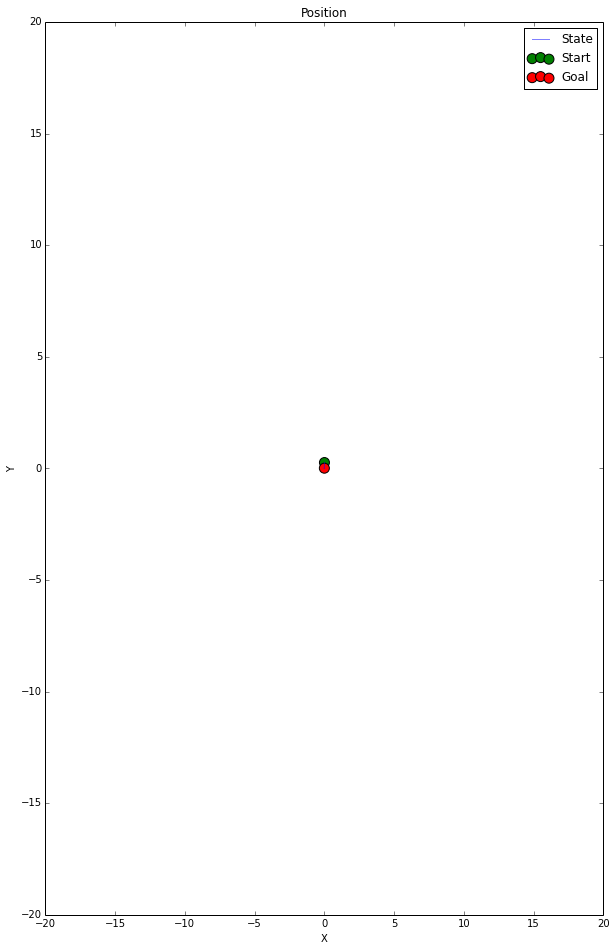

In [37]:
fig = plt.figure(figsize=(10,16))
plt.scatter(xt[0],yt[0], s=100, label='Start', c='g')
plt.scatter(xt[-1],yt[-1], s=100, label='Goal', c='r')
plt.plot(xt,yt, label='State',alpha=0.5)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Position')
plt.legend(loc='best')
plt.xlim([-20, 20])
plt.ylim([-20, 20])
plt.savefig('Kalman-Filter-CA-Position.png', dpi=72, transparent=True, bbox_inches='tight')